In [ ]:
###############################################################
#
#      CYCU Library Books Statistics
#
# 2023.03.25 V1.0
# (1)簡單的敘述性統計:
#    計算每位學生，每個系別和每本書的平均值、中位數、眾數、標準差和範圍。
#    這將有助於識別最受歡迎的書籍，系別和經常借書的學生。
###############################################################
import pandas as pd
import matplotlib.pyplot as plt

# List of unwanted keywords
unwanted = ['圖書館研讀室(使用1日)= Library study room (on a daily basis)',
            'Test Data for signal. 繪畫. 續 = Chinese art in overseas collections. chen. Hui hua. Hsu',
            '中原大學張靜愚紀念圖書館書香袋',
            '圖書館地下閱覽室長期租用存物櫃(使用7日)',
            '圖書館2樓長期租用存物櫃(使用7日)',
            '桃園地區大學校院七校互換借書證']
# 讀取 CSV 文件
df_tmp= pd.read_csv('data-1679628612278.csv')
#df_tmp = pd.read_csv('test1.csv')
# Use the "isin" method to check if any unwanted words are in the "Title" column
mask = ~df_tmp['Title'].isin(unwanted)
# Apply the mask to the dataframe to skip rows containing unwanted words
df= df_tmp[mask]


# 將時間列轉換為日期格式
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')
#print(df['Date'])
# 按照月份分組，計算每月借出的書籍數量
books_per_month = df.groupby(pd.Grouper(key='Date', freq='M'))['Title'].count()
# Count occurrences of each book title
book_counts = df['Title'].value_counts()


# Compute moving average with 3-month window
ma = books_per_month.rolling(window=3).mean()
ma6 = books_per_month.rolling(window=6).mean()
ma12= books_per_month.rolling(window=12).mean()
# Get top 100 most frequent book titles
top_100_books = book_counts.head(100)

# Print the latest and oldest date
oldest_date = df['Date'].min().strftime("%Y-%m-%d")
latest_date = df['Date'].max().strftime("%Y-%m-%d")
print(f"Oldest date: {oldest_date}")
print(f"Latest date: {latest_date}")

# 計算月借出的書籍數量的平均值、中位數和標準差
mean_books_per_month = books_per_month.mean()
median_books_per_month = books_per_month.median()
std_books_per_month = books_per_month.std()

# 印結果
print('月借出的書籍平均值：', mean_books_per_month)
print('月借出的書籍中位數：', median_books_per_month)
print('月借出的書籍標準差：', std_books_per_month)

# Print the results
print("Top 100 most frequently borrowed books:")
print(top_100_books)
# Save the data to a text file
# write the Series to a text file
top_100_books.to_csv('output_top100.txt', sep='\t')


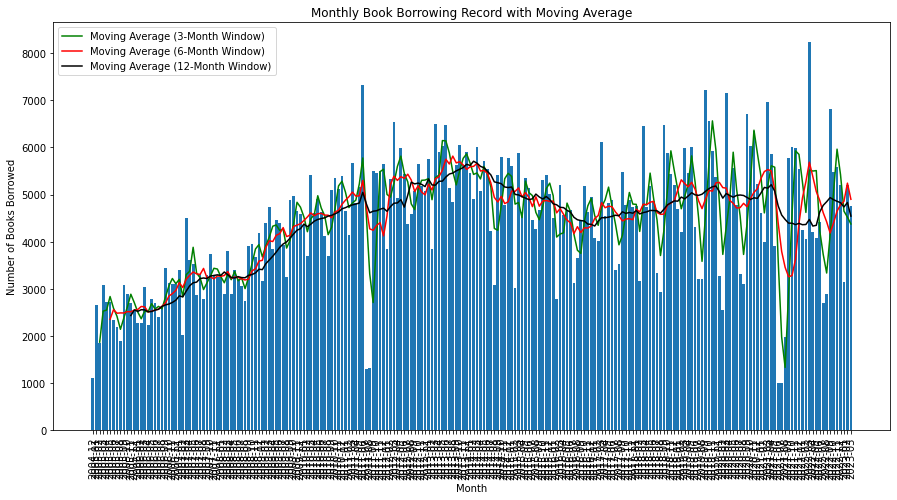

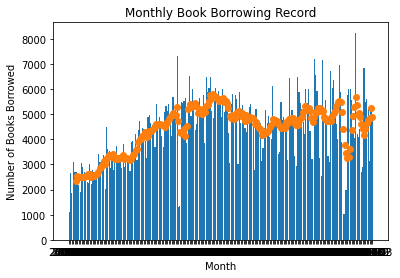

In [2]:

# 繪製條形圖
#
plt.figure(figsize=(15, 7.5))  # Set size of figure to 1024 x 768
plt.bar(books_per_month.index.strftime('%Y-%m'), books_per_month.values)
plt.plot(ma.index.strftime('%Y-%m'), ma.values, label='Moving Average (3-Month Window)',color='green')
plt.plot(ma6.index.strftime('%Y-%m'), ma6.values, label='Moving Average (6-Month Window)',color='red')
plt.plot(ma12.index.strftime('%Y-%m'), ma12.values, label='Moving Average (12-Month Window)',color='black')

plt.title('Monthly Book Borrowing Record with Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Books Borrowed')
plt.legend(loc = "upper left")
plt.xticks(rotation=90)
fig1 = plt.gcf() # Get current figure
fig1.savefig('monthly_borrowing_record_mv.png', dpi=300) 
# Save as png with 300 dpi resolution

plt.show()

plt.title('Monthly Book Borrowing Record')
plt.xlabel('Month')
plt.ylabel('Number of Books Borrowed')
#plt.bar(books_per_month.index, books_per_month.values, color='green')
plt.bar(books_per_month.index.strftime('%Y-%m'), books_per_month.values)
plt.scatter(ma6.index.strftime('%Y-%m'), ma6.values, label='Moving Average (6-Month Window)')
plt.show()